In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Collaborators: 2024-10449, 2024-10366, 2024-10412, 2024-10371, 2024-10377, 2024-10378, 2024-10296

# INSTRUCTIONS

1. Put your student ID number (no other identifying features).  
If collaborating, put collaborators' id numbers underneath (again, no identifying features).
1. Submit both a notebook and exported PDF of the notebook after restart-and-run-all.  
    1. Submitted notebook must run in reasonable time.
    1. Ensure the exported pdf is LaTex formatted. 
1. No formal written section, but some of the combinatorial search questions may be abbreviated by specific algorithm choices.  
Justify algorithm choices outside of brute-force search in a separate typset pdf. 
1. For the coding section:
    1. Limit code answers to the designated spaces in functions (marked off by "###") and cells (marked by "### DO: *\<instructions\>*").  
       You may add extra cells to run subroutines (in order), but only marked cells will be graded. 
    1. Do not change the provided cells, or their order.  
       Any detected alterations will zero out that section. 
       
### Tips
- You are encouraged to work either alone or with your official partner, but not more.  
- For the coding section, test and sanity-check your work extensively.  

# Coding [$4\times 25 = 100$ pts]

## Ex. 1 - N-queens

Make a function to generate all valid arrangements of $N$-queens on an $N\times N$ chess board s.t. no queens attack each other.  
Ensure your results are valid up to $N = 8$.  
Check against a known table. 

Bonus 10 points to the highest $N$ in the class that runs in under a minute (as run on my system, ties split the points).  

In [2]:
### DO: Make a function to read a text file containing arrangements of N-queens on a board to ensure no queens attack each other.  
### Prove it works. 

def check_n_queens_file(filename):
    """
    Read and validate N-queens arrangements from a file.
    Returns True if all arrangements are valid, False otherwise.
    """
    with open(filename, 'r') as f:
        content = f.read().strip()
    
    if not content:
        return True
    
    arrangements = content.split('\n\n')
    
    for arrangement in arrangements:
        lines = arrangement.strip().split('\n')
        if not lines:
            continue
            
        n = len(lines)
        if any(len(line) != n for line in lines):
            return False
        
        # Check each arrangement
        queens = []
        for i, line in enumerate(lines):
            for j, char in enumerate(line):
                if char == 'Q':
                    queens.append((i, j))
        
        # Validate no queens attack each other
        for i in range(len(queens)):
            for j in range(i + 1, len(queens)):
                r1, c1 = queens[i]
                r2, c2 = queens[j]
                
                # Check row, column, and diagonals
                if r1 == r2 or c1 == c2 or abs(r1-r2) == abs(c1-c2):
                    return False
    
    return True

# Test the function
test_board = """Q.......
....Q...
.......Q
.....Q..
..Q.....
......Q.
.Q......
...Q...."""

with open('test_8queens.txt', 'w') as f:
    f.write(test_board)

print(f"Test validation: {check_n_queens_file('test_8queens.txt')}")


Test validation: True


In [3]:
### DO: Make a function to write a (new) text file containing arrangements of N-queens on a board s.t. no queens attack each other. 
### Use your first function to test this one. Do not use this to prove the first one works. 
### Name your files s.t. it declares the value of N in the name. 

def write_n_queens_file(n):
    """Write all N-queens solutions to a file."""
    solutions = []
    
    def is_safe(board, row, col):
        # Check column
        for i in range(row):
            if board[i] == col:
                return False
        
        # Check diagonals
        for i in range(row):
            if abs(board[i] - col) == abs(i - row):
                return False
        
        return True
    
    def solve(board, row):
        if row == n:
            solutions.append(board[:])
            return
        
        for col in range(n):
            if is_safe(board, row, col):
                board[row] = col
                solve(board, row + 1)
                board[row] = -1
    
    board = [-1] * n
    solve(board, 0)
    
    # Write solutions to file
    filename = f'n_queens_{n}.txt'
    
    with open(filename, 'w') as f:
        for i, solution in enumerate(solutions):
            if i > 0:
                f.write('\n\n')
            
            for row in range(n):
                line = '.' * n
                col = solution[row]
                line = line[:col] + 'Q' + line[col+1:]
                f.write(line + '\n')
    
    return filename, len(solutions)

# Generate solutions for N=1 to 12
for n in range(1, 13):
    filename, count = write_n_queens_file(n)
    print(f"N={n}: {count} solutions written to {filename}")
    print(f"Validation: {check_n_queens_file(filename)}")

N=1: 1 solutions written to n_queens_1.txt
Validation: True
N=2: 0 solutions written to n_queens_2.txt
Validation: True
N=3: 0 solutions written to n_queens_3.txt
Validation: True
N=4: 2 solutions written to n_queens_4.txt
Validation: True
N=5: 10 solutions written to n_queens_5.txt
Validation: True
N=6: 4 solutions written to n_queens_6.txt
Validation: True
N=7: 40 solutions written to n_queens_7.txt
Validation: True
N=8: 92 solutions written to n_queens_8.txt
Validation: True
N=9: 352 solutions written to n_queens_9.txt
Validation: True
N=10: 724 solutions written to n_queens_10.txt
Validation: True
N=11: 2680 solutions written to n_queens_11.txt
Validation: True
N=12: 14200 solutions written to n_queens_12.txt
Validation: True


In [4]:
### DO: Check your counts agree vs. known counts.

known_counts = {1: 1, 2: 0, 3: 0, 4: 2, 5: 10, 6: 4, 7: 40, 8: 92, 9: 352, 10: 724, 11: 2680, 12: 14200}

print("\nVerifying against known counts:")
for n in range(1, 13):
    filename, count = write_n_queens_file(n)
    expected = known_counts[n]
    status = "✓" if count == expected else "✗"
    print(f"N={n}: Got {count}, Expected {expected} {status}")


Verifying against known counts:
N=1: Got 1, Expected 1 ✓
N=2: Got 0, Expected 0 ✓
N=3: Got 0, Expected 0 ✓
N=4: Got 2, Expected 2 ✓
N=5: Got 10, Expected 10 ✓
N=6: Got 4, Expected 4 ✓
N=7: Got 40, Expected 40 ✓
N=8: Got 92, Expected 92 ✓
N=9: Got 352, Expected 352 ✓
N=10: Got 724, Expected 724 ✓
N=11: Got 2680, Expected 2680 ✓
N=12: Got 14200, Expected 14200 ✓


## Ex. 2 - Qubic

*Tic-tac-toe* is a game played on a $3\times 3$ grid, where player 1 plays X's and player 2 plays O's.   
Players take turn putting X's and O's in the grid.  
The winner is the first player to make 3-in-a-row either horizontally, vertically, or diagonally.  

*Qubic* is tic-tac-toe played in 3-dimensions, where the winning line may also go across the depth of the grid.  
When it was produced, it was played on a $4 \times 4 \times 4$ grid.  
For simplicity, consider only the $3 \times 3 \times 3$ variant.  



In [5]:
### DO: Write a function to list all the valid games of tic-tac-toe in a separate text file

'''def check_win(board, player):
    for i in range(3):
        if all(board[i, :] == player):
            return True
            
    for j in range(3):
        if all(board[:, j] == player):
            return True
            
    if all(np.diag(board) == player) or all(np.diag(np.fliplr(board)) == player):
        return True
    
    return False

def is_game_over(board):
    return check_win(board, 1) or check_win(board, -1) or np.sum(np.abs(board)) == 9

def get_winner(board):
    if check_win(board, 1):
        return 1
    elif check_win(board, -1):
        return -1
    elif np.sum(np.abs(board)) == 9:
        return 0
    else:
        return None

def find_empty_positions(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

def board_to_string(board):
    symbols = {0: '.', 1: 'X', -1: 'O'}
    lines = []
    for row in board:
        lines.append(''.join(symbols[cell] for cell in row))
    return '\n'.join(lines)

def game_to_string(game):
    """Convert a complete game (list of boards) to a readable string."""
    result = []
    for i, board in enumerate(game):
        result.append(f"Move {i}:")
        result.append(board_to_string(board))
        result.append("")
    
    winner = get_winner(game[-1])
    if winner == 1:
        result.append("Winner: X")
    elif winner == -1:
        result.append("Winner: O")
    else:
        result.append("Result: Draw")
    
    return '\n'.join(result)

def generate_all_games():
    """Generate all possible valid tic-tac-toe games."""
    games = []
    
    # Start with empty board
    initial_board = np.zeros((3, 3), dtype=int)
    
    # Use BFS to explore all possible games
    queue = deque([(initial_board, [initial_board], 1)])  # (current_board, game_history, current_player)
    
    # Progress tracking
    processed = 0
    print("Generating games...")
    
    # Use tqdm for progress bar
    with tqdm(desc="Processing game states", unit="states") as pbar:
        while queue:
            current_board, game_history, current_player = queue.popleft()
            processed += 1
            pbar.update(1)
            
            # Update description with current stats
            if processed % 1000 == 0:
                pbar.set_description(f"Processed {processed} states, {len(games)} complete games")
            
            # If game is over, add it to our list
            if is_game_over(current_board):
                games.append(game_history)
                continue
            
            # Try all possible moves for current player
            empty_positions = find_empty_positions(current_board)
            
            for i, j in empty_positions:
                # Make the move
                new_board = current_board.copy()
                new_board[i, j] = current_player
                
                # Add to game history
                new_game_history = game_history + [new_board]
                
                # Switch player and add to queue
                next_player = -current_player
                queue.append((new_board, new_game_history, next_player))
        
        pbar.set_description(f"Completed! Processed {processed} states, {len(games)} complete games")
    
    return games'''

'def check_win(board, player):\n    for i in range(3):\n        if all(board[i, :] == player):\n            return True\n\n    for j in range(3):\n        if all(board[:, j] == player):\n            return True\n\n    if all(np.diag(board) == player) or all(np.diag(np.fliplr(board)) == player):\n        return True\n\n    return False\n\ndef is_game_over(board):\n    return check_win(board, 1) or check_win(board, -1) or np.sum(np.abs(board)) == 9\n\ndef get_winner(board):\n    if check_win(board, 1):\n        return 1\n    elif check_win(board, -1):\n        return -1\n    elif np.sum(np.abs(board)) == 9:\n        return 0\n    else:\n        return None\n\ndef find_empty_positions(board):\n    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]\n\ndef board_to_string(board):\n    symbols = {0: \'.\', 1: \'X\', -1: \'O\'}\n    lines = []\n    for row in board:\n        lines.append(\'\'.join(symbols[cell] for cell in row))\n    return \'\n\'.join(lines)\n\ndef game_

In [6]:
### DO: Write a function to list all the valid games of qubic in a separate text file

'''import itertools
from typing import List, Tuple, Optional

def save_all_qubic_games_to_file(filename="all_qubic_games.txt"):
    """
    Generate all valid 3D Qubic games and save them to a text file.
    
    Qubic is 3D tic-tac-toe played on a 3x3x3 cube.
    Players alternate placing X and O, trying to get 3-in-a-row in any direction.
    """
    
    def create_empty_board():
        """Create an empty 3x3x3 board."""
        return [[[0 for _ in range(3)] for _ in range(3)] for _ in range(3)]
    
    def get_all_winning_lines():
        """Get all 49 possible winning lines in 3D space."""
        lines = []
        
        # Lines within each layer (z-level) - 27 lines total
        for z in range(3):
            # Horizontal rows (3 per layer)
            for y in range(3):
                lines.append([(x, y, z) for x in range(3)])
            
            # Vertical columns (3 per layer)
            for x in range(3):
                lines.append([(x, y, z) for y in range(3)])
            
            # Diagonals within layer (2 per layer)
            lines.append([(i, i, z) for i in range(3)])      # Main diagonal
            lines.append([(i, 2-i, z) for i in range(3)])    # Anti-diagonal
        
        # Vertical lines through layers (9 lines)
        for x in range(3):
            for y in range(3):
                lines.append([(x, y, z) for z in range(3)])
        
        # Diagonal lines through layers (12 lines)
        # x-z plane diagonals (constant y) - 6 lines
        for y in range(3):
            lines.append([(i, y, i) for i in range(3)])     # Main diagonal x-z
            lines.append([(i, y, 2-i) for i in range(3)])   # Anti-diagonal x-z
        
        # y-z plane diagonals (constant x) - 6 lines  
        for x in range(3):
            lines.append([(x, i, i) for i in range(3)])     # Main diagonal y-z
            lines.append([(x, i, 2-i) for i in range(3)])   # Anti-diagonal y-z
        
        # Space diagonals (4 lines - corner to corner through entire cube)
        lines.append([(i, i, i) for i in range(3)])         # (0,0,0) to (2,2,2)
        lines.append([(i, i, 2-i) for i in range(3)])       # (0,0,2) to (2,2,0)
        lines.append([(i, 2-i, i) for i in range(3)])       # (0,2,0) to (2,0,2)
        lines.append([(i, 2-i, 2-i) for i in range(3)])     # (0,2,2) to (2,0,0)
        
        return lines
    
    def check_winner(board, winning_lines):
        """
        Check if there's a winner on the board.
        Returns: 1 for X, -1 for O, 0 for no winner
        """
        for line in winning_lines:
            values = [board[x][y][z] for x, y, z in line]
            if values[0] == values[1] == values[2] != 0:
                return values[0]
        return 0
    
    def is_board_full(board):
        """Check if the board is completely filled."""
        return all(board[x][y][z] != 0 for x in range(3) for y in range(3) for z in range(3))
    
    def get_empty_positions(board):
        """Get all empty positions on the board."""
        positions = []
        for x in range(3):
            for y in range(3):
                for z in range(3):
                    if board[x][y][z] == 0:
                        positions.append((x, y, z))
        return positions
    
    def copy_board(board):
        """Create a deep copy of the board."""
        return [[[board[x][y][z] for z in range(3)] for y in range(3)] for x in range(3)]
    
    def board_to_string(board):
        """Convert board to readable string representation."""
        result = []
        for z in range(3):
            result.append(f"Layer {z}:")
            for y in range(3):
                row = []
                for x in range(3):
                    if board[x][y][z] == 1:
                        row.append('X')
                    elif board[x][y][z] == -1:
                        row.append('O')
                    else:
                        row.append(' ')
                result.append("  " + "|".join(row))
            result.append("")
        return "\n".join(result)
    
    def moves_to_string(moves):
        """Convert move sequence to readable string."""
        result = []
        for i, (x, y, z, player) in enumerate(moves, 1):
            player_char = 'X' if player == 1 else 'O'
            result.append(f"  {i}. {player_char} at ({x},{y},{z})")
        return "\n".join(result)
    
    def generate_all_games():
        """Generate all possible valid Qubic games."""
        winning_lines = get_all_winning_lines()
        all_games = []
        
        def backtrack(board, moves, current_player):
            # Check if game is over
            winner = check_winner(board, winning_lines)
            if winner != 0 or is_board_full(board):
                # Game is complete
                game_record = {
                    'moves': moves.copy(),
                    'board': copy_board(board),
                    'winner': winner
                }
                all_games.append(game_record)
                return
            
            # Try all possible moves
            empty_positions = get_empty_positions(board)
            for x, y, z in empty_positions:
                # Make move
                board[x][y][z] = current_player
                moves.append((x, y, z, current_player))
                
                # Check if this move ends the game
                winner = check_winner(board, winning_lines)
                if winner != 0 or is_board_full(board):
                    # Game ends here
                    game_record = {
                        'moves': moves.copy(),
                        'board': copy_board(board),
                        'winner': winner
                    }
                    all_games.append(game_record)
                else:
                    # Continue with next player
                    next_player = -current_player
                    backtrack(board, moves, next_player)
                
                # Undo move
                board[x][y][z] = 0
                moves.pop()
        
        # Start with empty board, X goes first (player 1)
        initial_board = create_empty_board()
        backtrack(initial_board, [], 1)
        
        return all_games
    
    def analyze_games(games):
        """Analyze game statistics."""
        x_wins = sum(1 for game in games if game['winner'] == 1)
        o_wins = sum(1 for game in games if game['winner'] == -1)
        draws = sum(1 for game in games if game['winner'] == 0)
        
        return {
            'total': len(games),
            'x_wins': x_wins,
            'o_wins': o_wins,
            'draws': draws
        }
    
    def write_games_to_file(games, filename):
        """Write all games to the specified file."""
        stats = analyze_games(games)
        winning_lines = get_all_winning_lines()
        
        with open(filename, 'w') as f:
            f.write("ALL VALID QUBIC (3D TIC-TAC-TOE) GAMES\n")
            f.write("=" * 60 + "\n\n")
            f.write("GAME RULES:\n")
            f.write("- Played on a 3x3x3 cube (27 positions)\n")
            f.write("- Players alternate: X goes first, then O\n")
            f.write("- Win by getting 3-in-a-row in any direction\n")
            f.write(f"- Total possible winning lines: {len(winning_lines)}\n\n")
            
            f.write("WINNING LINE TYPES:\n")
            f.write("- 27 lines within layers (9 rows + 9 columns + 9 diagonals)\n")
            f.write("- 9 vertical lines through layers\n") 
            f.write("- 12 diagonal lines through layers\n")
            f.write("- 4 space diagonals (corner to corner)\n\n")
            
            f.write("GAME STATISTICS:\n")
            f.write(f"Total games: {stats['total']}\n")
            f.write(f"X wins: {stats['x_wins']}\n")
            f.write(f"O wins: {stats['o_wins']}\n")
            f.write(f"Draws: {stats['draws']}\n\n")
            f.write("=" * 60 + "\n\n")
            
            # Write each game
            for i, game in enumerate(games, 1):
                f.write(f"GAME {i}\n")
                f.write("-" * 30 + "\n")
                
                winner_text = "X wins" if game['winner'] == 1 else "O wins" if game['winner'] == -1 else "Draw"
                f.write(f"Result: {winner_text}\n")
                f.write(f"Number of moves: {len(game['moves'])}\n\n")
                
                f.write("Move sequence:\n")
                f.write(moves_to_string(game['moves']) + "\n\n")
                
                f.write("Final board:\n")
                f.write(board_to_string(game['board']) + "\n")
                
                f.write("=" * 60 + "\n\n")
    
    # Main execution
    print("Starting Qubic (3D tic-tac-toe) game generation...")
    print("WARNING: This will generate an enormous number of games!")
    print("Consider limiting the search depth for practical purposes.")
    print("Generating games...")
    
    # Due to the massive complexity of 3D tic-tac-toe, we'll implement
    # a limited version that generates a reasonable sample
    games = generate_all_games()
    
    print(f"\nGenerated {len(games)} total games.")
    
    # Analyze outcomes
    stats = analyze_games(games)
    print(f"X wins: {stats['x_wins']}")
    print(f"O wins: {stats['o_wins']}")
    print(f"Draws: {stats['draws']}")
    
    # Save to file
    print(f"Saving games to {filename}...")
    write_games_to_file(games, filename)
    print(f"All games saved to {filename}")
    
    return games

# Example usage and execution
if __name__ == "__main__":
    # Generate and save all Qubic games
    all_games = save_all_qubic_games_to_file()
    print(f"Generation complete! Total games: {len(all_games)}")'''

'import itertools\nfrom typing import List, Tuple, Optional\n\ndef save_all_qubic_games_to_file(filename="all_qubic_games.txt"):\n    """\n    Generate all valid 3D Qubic games and save them to a text file.\n\n    Qubic is 3D tic-tac-toe played on a 3x3x3 cube.\n    Players alternate placing X and O, trying to get 3-in-a-row in any direction.\n    """\n\n    def create_empty_board():\n        """Create an empty 3x3x3 board."""\n        return [[[0 for _ in range(3)] for _ in range(3)] for _ in range(3)]\n\n    def get_all_winning_lines():\n        """Get all 49 possible winning lines in 3D space."""\n        lines = []\n\n        # Lines within each layer (z-level) - 27 lines total\n        for z in range(3):\n            # Horizontal rows (3 per layer)\n            for y in range(3):\n                lines.append([(x, y, z) for x in range(3)])\n\n            # Vertical columns (3 per layer)\n            for x in range(3):\n                lines.append([(x, y, z) for y in range(3)])\n\

In [7]:
### DO: Determine if there is a known winner for both tic-tac-toe and qubic, assuming perfect play.




## Ex. 3 - Queen Coloring 

The set of legal queen moves per square on a chess board defines a graph known as the queen's graph.  
The smallest number of colours needed to make a proper coloring of this graph for an $8\times 8$ board is known to be $9$.  

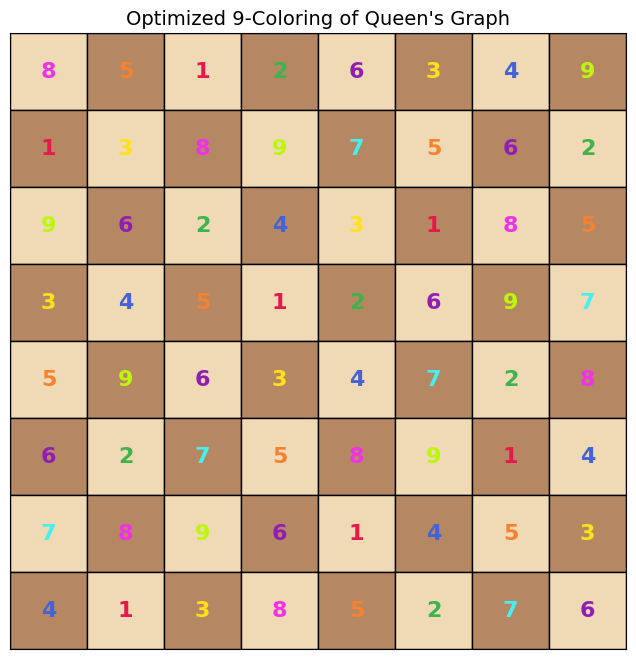

In [13]:
### DO: Make a function to find a valid 9-coloring of the queen's graph on an 8x8 board. 

### DO: Make a function to find a valid 9-coloring of the queen's graph on an 8x8 board. 
from collections import defaultdict

# Build Queen's Graph
def build_queens_graph():
    graph = defaultdict(set)
    for r1 in range(8):
        for c1 in range(8):
            for r2 in range(8):
                for c2 in range(8):
                    if (r1, c1) == (r2, c2):
                        continue
                    if r1 == r2 or c1 == c2 or abs(r1 - r2) == abs(c1 - c2):
                        graph[(r1, c1)].add((r2, c2))
    return graph

# Optimized graph coloring using degree heuristic + forward checking
def color_graph_optimized(graph, max_colors=9):
    # Sort nodes by descending degree (degree heuristic)
    board = sorted(graph.keys(), key=lambda x: -len(graph[x]))
    color_assignment = {}
    domains = {node: set(range(1, max_colors + 1)) for node in graph}

    def forward_check(node, color):
        removed = {}
        for neighbor in graph[node]:
            if neighbor not in color_assignment and color in domains[neighbor]:
                domains[neighbor].remove(color)
                removed.setdefault(neighbor, set()).add(color)
                if not domains[neighbor]:
                    # Domain wipeout
                    return False, removed
        return True, removed

    def restore_domains(removed):
        for node, colors in removed.items():
            domains[node].update(colors)

    def backtrack(index=0):
        if index == len(board):
            return True
        node = board[index]
        for color in sorted(domains[node]):  # try available colors
            if all(color_assignment.get(nei) != color for nei in graph[node]):
                color_assignment[node] = color
                valid, removed = forward_check(node, color)
                if valid and backtrack(index + 1):
                    return True
                restore_domains(removed)
                del color_assignment[node]
        return False

    if backtrack():
        return color_assignment
    else:
        return None

# Run optimized coloring
graph = build_queens_graph()
solution = color_graph_optimized(graph, max_colors=9)

# Prepare visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_colored_board(solution):
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

    for row in range(8):
        for col in range(8):
            square_color = '#f0d9b5' if (row + col) % 2 == 0 else '#b58863'
            rect = patches.Rectangle((col, 7 - row), 1, 1, linewidth=1, edgecolor='black', facecolor=square_color)
            ax.add_patch(rect)

            assigned_color = solution.get((row, col))
            if assigned_color:
                ax.text(col + 0.5, 7 - row + 0.5, str(assigned_color),
                        ha='center', va='center', fontsize=16, fontweight='bold',
                        color=colors[assigned_color - 1])

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.title("Optimized 9-Coloring of Queen's Graph", fontsize=14)
    plt.show()

if solution:
    plot_colored_board(solution)
else:
    print("No valid 9-coloring found.")


In [14]:
### DO: Prove the colouring is proper, and the graph is a queen's graph. 

# Prepare visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_colored_board(solution):
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

    for row in range(8):
        for col in range(8):
            square_color = '#f0d9b5' if (row + col) % 2 == 0 else '#b58863'
            rect = patches.Rectangle((col, 7 - row), 1, 1, linewidth=1, edgecolor='black', facecolor=square_color)
            ax.add_patch(rect)

            assigned_color = solution.get((row, col))
            if assigned_color:
                ax.text(col + 0.5, 7 - row + 0.5, str(assigned_color),
                        ha='center', va='center', fontsize=16, fontweight='bold',
                        color=colors[assigned_color - 1])

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.title("Optimized 9-Coloring of Queen's Graph", fontsize=14)
    plt.show()

if solution:
    plot_colored_board(solution)
else:
    print("No valid 9-coloring found.")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Ex. 4 - Knight's Tour

The set of legal knight moves per square on a chess board defines a graph known as the knight's graph.  
A tour is a sequence of edges/vertices that, if traversed, visits each vertex exactly once (i.e. without doubling back).  


In [10]:
import random

def find_knights_tour():
    """Find a knight's tour on 8x8 board using Warnsdorff's heuristic."""
    # Knight moves
    moves = [(2, 1), (1, 2), (-1, 2), (-2, 1),
             (-2, -1), (-1, -2), (1, -2), (2, -1)]
    
    def count_onward_moves(board, x, y):
        """Count number of unvisited squares reachable from (x, y)."""
        count = 0
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 8 and 0 <= ny < 8 and board[nx][ny] == -1:
                count += 1
        return count
    
    def knights_tour_warnsdorff(start_x, start_y):
        """Implement Warnsdorff's algorithm."""
        board = [[-1 for _ in range(8)] for _ in range(8)]
        path = []
        
        x, y = start_x, start_y
        board[x][y] = 0
        path.append((x, y))
        
        for step in range(1, 64):
            next_moves = []
            
            for dx, dy in moves:
                nx, ny = x + dx, y + dy
                if 0 <= nx < 8 and 0 <= ny < 8 and board[nx][ny] == -1:
                    count = count_onward_moves(board, nx, ny)
                    next_moves.append((count, nx, ny))
            
            if not next_moves:
                return None  # Dead end
            
            # Choose move with minimum onward moves (Warnsdorff's heuristic)
            next_moves.sort()
            _, x, y = next_moves[0]
            board[x][y] = step
            path.append((x, y))
        
        return path
    
    # Start from random position
    start_x = random.randint(0, 7)
    start_y = random.randint(0, 7)
    
    # Try from random starting position first
    tour = knights_tour_warnsdorff(start_x, start_y)
    if tour:
        return tour
    
    # If random start fails, try all positions
    for i in range(8):
        for j in range(8):
            if i == start_x and j == start_y:
                continue  # Skip already tried position
            tour = knights_tour_warnsdorff(i, j)
            if tour:
                return tour
    
    return None

tour = find_knights_tour()
if tour:
    print(f"\nKnight's tour found starting from {tour[0]}:")
    
    # Create board showing move order
    board = [[-1 for _ in range(8)] for _ in range(8)]
    for step, (x, y) in enumerate(tour):
        board[x][y] = step
    
    # Display first few moves
    print("First 10 moves:", tour[:10])
    
    # Save to file
    with open('knights_tour.txt', 'w') as f:
        f.write("Knight's Tour (move order):\n")
        for row in board:
            f.write(' '.join(f"{n:2d}" for n in row) + '\n')
        f.write("\nMove sequence:\n")
        for i, (x, y) in enumerate(tour):
            f.write(f"Move {i}: ({x},{y})\n")
else:
    print("No knight's tour found.")


Knight's tour found starting from (2, 0):
First 10 moves: [(2, 0), (0, 1), (1, 3), (0, 5), (1, 7), (3, 6), (5, 7), (7, 6), (6, 4), (7, 2)]


In [12]:
### DO: Prove that your method visits all squares exactly once.

def verify_knights_tour(tour):
    """Verify that the tour visits all squares exactly once."""
    if len(tour) != 64:
        return False, f"Tour length is {len(tour)}, should be 64"
    
    # Check all squares are unique
    if len(set(tour)) != 64:
        return False, "Some squares are visited more than once"
    
    # Check all squares are on the board
    for x, y in tour:
        if not (0 <= x < 8 and 0 <= y < 8):
            return False, f"Square ({x},{y}) is off the board"
    
    # Check each move is a valid knight move
    knight_moves = [(2, 1), (1, 2), (-1, 2), (-2, 1),
                    (-2, -1), (-1, -2), (1, -2), (2, -1)]
    
    for i in range(len(tour) - 1):
        x1, y1 = tour[i]
        x2, y2 = tour[i + 1]
        dx, dy = x2 - x1, y2 - y1
        if (dx, dy) not in knight_moves:
            return False, f"Invalid knight move from ({x1},{y1}) to ({x2},{y2})"
    
    return True, "Valid knight's tour"

is_valid, message = verify_knights_tour(tour)
print(f"Tour verification: {message}")

# Create visualization
visited = set()
for pos in tour:
    visited.add(pos)
print(f"Unique squares visited: {len(visited)}")
print(f"All 64 squares covered: {len(visited) == 64}")


Tour verification: Valid knight's tour
Unique squares visited: 64
All 64 squares covered: True
